In [ ]:
import pandas as pd
import numpy as np
from numpy.linalg import inv
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from numpy.linalg import inv
from sklearn.preprocessing import StandardScaler

## Questão 1

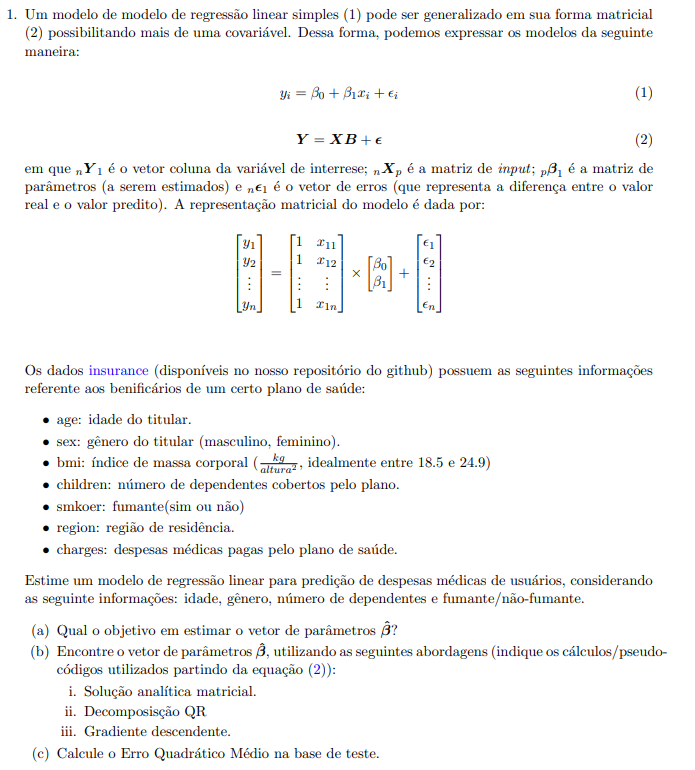

### 2 - a) β é uma estimativa dos parâmetros que minimizam a diferença entre os valores observados e os valores previstos pelo modelo.

##Carregar a base

In [ ]:
dados = pd.read_csv('https://raw.githubusercontent.com/Cayan-Portela/ceub/main/dados/insurance_treino.csv', sep = ';', decimal = ',')

In [ ]:
dados['sex'] = dados['sex'].replace({'male': 1, 'female': 0})
dados['smoker'] = dados['smoker'].replace({'yes': 1, 'no': 0})

In [ ]:
teste = pd.read_csv('https://raw.githubusercontent.com/Cayan-Portela/ceub/main/dados/insurance_teste.csv', sep = ';', decimal = ',')

In [ ]:
teste['sex'] = teste['sex'].replace({'male': 1, 'female': 0})
teste['smoker'] = teste['smoker'].replace({'yes': 1, 'no': 0})

In [ ]:
dados.head()

,age,sex,bmi,children,smoker,region,charges
0,34,0,23.56,0,0,northeast,4992.3764
1,45,0,33.10,0,0,southwest,7345.0840
2,23,1,32.70,3,0,southwest,3591.4800
3,38,0,19.95,2,0,northeast,7133.9025
4,32,0,29.80,2,0,southwest,5152.1340


In [ ]:
# Matriz X
def matriz_x(coluna, dados):

    n_ = dados.shape[0]
    col_1 = np.ones(n_)
    col_var = dados[coluna]

    X_mat = np.c_[col_1, np.array(col_var)]

    return X_mat

In [ ]:
# Separar as colunas
y_ = dados['charges']
colunas_x = ['age', 'sex','children','smoker']
X_mat = matriz_x(coluna = colunas_x, dados = dados)

In [ ]:
# X'X
xlx = X_mat.T @ X_mat

In [ ]:
# Inversa da X'X
inv_xlx = inv(xlx)
inv_xlx

array([[ 1.08508144e-02, -1.98242452e-04, -2.10631615e-03,
        -6.66333767e-04, -1.27006185e-03],
       [-1.98242452e-04,  5.05745428e-06,  2.68038790e-06,
        -2.44059695e-06,  6.09495218e-06],
       [-2.10631615e-03,  2.68038790e-06,  4.03032062e-03,
        -8.78729785e-06, -3.80467245e-04],
       [-6.66333767e-04, -2.44059695e-06, -8.78729785e-06,
         7.05162681e-04, -3.10858693e-05],
       [-1.27006185e-03,  6.09495218e-06, -3.80467245e-04,
        -3.10858693e-05,  6.24869810e-03]])

$\beta = (X'X)^{-1} X'Y$

In [ ]:
# Betas
betas = inv_xlx @ X_mat.T @ y_
betas

array([-3017.92453292,   272.20653435,   -57.34384981,   556.55795561,
       23799.89105225])

###b) Gradiente - Acha o mínimo

In [ ]:
# Função Gradiente
def grad_ (X, B, Y):
  n = len(Y)
  grad = X.T @ (X @ B - Y) / n

  return grad

In [ ]:
# Lista para os Betas
betas_ = list()
betas_.append(
    np.array([0,0])
)

In [ ]:
# Gradiente
n_iter = 1000 # Iterações
alpha = 0.01 # Fixo

for i in range(1, n_iter):
  gradiente = grad_(X =X_mat, B =betas, Y= y_)

  betas_.append(
      betas - alpha * gradiente

  )

In [ ]:
# Betas
betas_[999]

array([-3017.92453292,   272.20653435,   -57.34384981,   556.55795561,
       23799.89105225])

In [ ]:
# Conferir os resultados com o  Sklearn
X = dados[['age', 'sex', 'children', 'smoker']]
regr = LinearRegression()
regr.fit(X, y_)

LinearRegression()

In [ ]:
print(f'Intercepto: {regr.intercept_}\n Betas: {regr.coef_}')

Intercepto: -3017.924532924948
 Betas: [  272.20653435   -57.34384981   556.55795561 23799.89105225]


### c) Erro Quadrático Médio na base de teste

In [ ]:
# Base teste
X_teste = matriz_x(coluna = colunas_x, dados = teste)

In [ ]:
# Preditos
preditos = X_teste @ betas
preditos[:10]

array([ 2381.00719124,  5420.47803204,  8723.39110499,  8109.48929957,
       13314.46752829,  3185.4819074 ,  2653.21372559, 28890.81870012,
       13314.46752829, 14711.93486077])

In [ ]:
erro = teste['charges'] - preditos
# Erro Quadrático Médio
np.mean(erro**2)

48343255.087442786

In [ ]:
# Conferindo o resultado
erro_lr = regr.predict(X_teste[:, 1:]) - teste['charges']
np.mean(erro_lr**2)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


48343255.08744279

## Questão 2

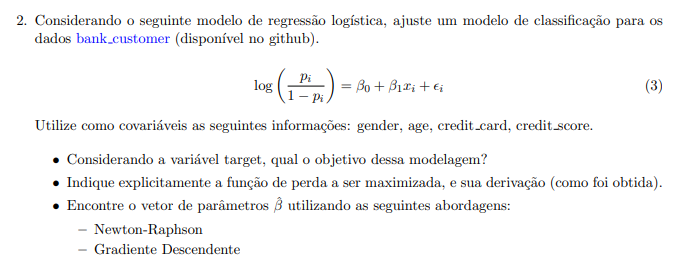

In [ ]:
# Display only 2 decimals on pandas data frames
pd.options.display.float_format = '{:.2f}'.format

# Display all cell results (not only last one)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
# Lendo dados de treino
dados = pd.read_csv('https://raw.githubusercontent.com/Cayan-Portela/ceub/main/dados/bank_customer_treino.csv')
dados.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15765192,564,France,Male,26,7,84006.88,2,0,0,183490.99,0
1,15631882,688,Germany,Male,45,9,103399.87,1,0,0,129870.93,0
2,15777586,784,Spain,Female,42,2,109052.04,2,1,0,6409.55,0
3,15577107,657,Spain,Female,22,6,0.00,3,0,1,168412.07,1
4,15722731,653,France,Male,46,0,119556.10,1,1,0,78250.13,1


In [ ]:
# pre-process da coluna gender
dados['gender'] = np.where(dados.gender == "Male", 1,  0)

In [ ]:
# Dataframe com as colunas normalizadas
df_norm = dados.copy()

In [ ]:
df_norm['gender'] = np.where(df_norm.gender == "Male", 1,  0)

In [ ]:
df_norm.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15765192,564,France,0,26,7,84006.88,2,0,0,183490.99,0
1,15631882,688,Germany,0,45,9,103399.87,1,0,0,129870.93,0
2,15777586,784,Spain,0,42,2,109052.04,2,1,0,6409.55,0
3,15577107,657,Spain,0,22,6,0.00,3,0,1,168412.07,1
4,15722731,653,France,0,46,0,119556.10,1,1,0,78250.13,1


In [ ]:
# Normalizar
scaler = StandardScaler()

cols_to_normalize = [ 'age', 'credit_score']

# Ajustar e transformar as colunas selecionadas
df_norm[cols_to_normalize] = scaler.fit_transform(df_norm[cols_to_normalize])

In [ ]:
dados.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15765192,564,France,1,26,7,84006.88,2,0,0,183490.99,0
1,15631882,688,Germany,1,45,9,103399.87,1,0,0,129870.93,0
2,15777586,784,Spain,0,42,2,109052.04,2,1,0,6409.55,0
3,15577107,657,Spain,0,22,6,0.00,3,0,1,168412.07,1
4,15722731,653,France,1,46,0,119556.10,1,1,0,78250.13,1


In [ ]:
# covariaveis (col_x) e variavel target (col_y)
col_x = ['credit_score', 'gender', 'age', 'credit_card']
col_y = 'churn'

In [ ]:
def matriz_x(colunas, dados):
    n_ = dados.shape[0]
    col_1 = np.ones(n_)
    col_var = dados[colunas]

    X_mat = np.c_[col_1, np.array(col_var)]

    return X_mat

In [ ]:
y = dados[col_y]
X_mat = matriz_x(colunas=col_x, dados=dados)

## Newton-Raphson

In [ ]:
def beta_inicial(X):
    return np.zeros(X.shape[1])

In [ ]:
def calcula_p(X, B):
    return np.exp(X @ B) / (1 + np.exp(X @ B))

In [ ]:
def beta_update(X, W, y, p):
    return inv(X.T @ W  @  X) @ X.T @ (y-p)

In [ ]:
# Iteracoes
betas = beta_inicial(X_mat)
p = calcula_p(X=X_mat, B=betas)
W = np.diag(p)


for i in range(20):
    p =  calcula_p(X=X_mat, B=betas)
    W = np.diag(p)
    beta_k1 = beta_update(X=X_mat, W=W, y=y, p=p)
    betas = betas + beta_k1

In [ ]:
betas

array([-3.25658521e+00, -6.58125817e-04, -4.89180017e-01,  6.40564764e-02,
       -4.90816166e-02])

## Gradiente

In [ ]:
X_mat_std = matriz_x(colunas=col_x, dados=df_norm)

In [ ]:
# Gradiente Descendente
betas_std = beta_inicial(X_mat_std)
lr = 0.01
m = X_mat.shape[0]

for i in range(20000):
    p =  calcula_p(X=X_mat_std, B=betas_std)
    grad_beta = -(1/m) * X_mat_std.T @ (y-p)
    betas_std = betas_std - lr * grad_beta

In [ ]:
betas_std

array([-1.41773972, -0.06141879,  0.        ,  0.67829356, -0.06438485])

In [ ]:
sk_logistica = LogisticRegression()
sk_logistica.fit(dados[col_x], y)
pred_sk = sk_logistica.predict_proba(dados[col_x][:5])

LogisticRegression()

In [ ]:
# Resultados
print("Betas:")
print(f"Sklearn:        {np.round([sk_logistica.intercept_[0]] + sk_logistica.coef_[0].tolist(), 4)}")
print(f"Newton-Raphson: {np.round(betas, 4)}")
print(f"Gradiente:      {np.round(betas_std, 8)}")

Betas:
Sklearn:        [-3.2706e+00 -6.0000e-04 -4.9520e-01  6.4200e-02 -5.2900e-02]
Newton-Raphson: [-3.2566e+00 -7.0000e-04 -4.8920e-01  6.4100e-02 -4.9100e-02]
Gradiente:      [-1.41773972 -0.06141879  0.          0.67829356 -0.06438485]


In [ ]:
print(f"Probabilidade de churn para as 5 primeiras observações:")
print(f"scikit-learn:     {[np.round(x[1], 7) for x in pred_sk]}")
print(f"Newton-Raphson:   {calcula_p(X_mat[:5,:], betas)}")
print(f"Gradiente:        {calcula_p(X_mat_std[:5,:], betas_std)}")

Probabilidade de churn para as 5 primeiras observações:
scikit-learn:     [0.0789823, 0.2115567, 0.2447009, 0.0930356, 0.2172121]
Newton-Raphson:   [0.0793304  0.21148217 0.24392764 0.09281557 0.21788999]
Gradiente:        [0.09988173 0.25636954 0.20075348 0.07497112 0.26051133]


## Achar a probabilidade de churn de cada cliente na base de teste

In [ ]:
# Carregando a base de teste
dados_teste = pd.read_csv('https://raw.githubusercontent.com/Cayan-Portela/ceub/main/dados/bank_custoter_teste.csv')
dados_teste['gender'] = np.where(dados_teste.gender == "Male", 1, 0)

In [ ]:
X_mat_teste = matriz_x(colunas=col_x, dados=dados_teste)
p_teste = calcula_p(X=X_mat_teste, B=betas)

In [ ]:
# ordernando as probabilidades "p_teste" da maior para a menor
# olhando as 10 maiores probabilidades estimadas
np.sort(p_teste)[::-1][:10]

array([0.86478835, 0.83914253, 0.83676744, 0.83495899, 0.82278887,
       0.80055285, 0.79392211, 0.78976356, 0.78309564, 0.77431609])

In [ ]:
dados_teste.churn.value_counts(normalize=True)

0   0.80
1   0.20
Name: churn, dtype: float64

## Questão 3

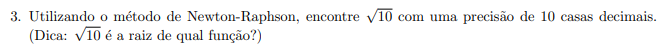

a) Newton Raphson - Acha a Raiz

$\sqrt{10} = x$

$x^2 = 10$

$x^2 - 10 = 0$


In [ ]:
def x_update(x):
    #return (1/2) * (x  + 10/x)
    return ((x**2)-10) / (2*x)

In [ ]:
x_ = 3

for i in range(20):
    x_ = x_ - x_update(x_)
    print(x_)

3.1666666666666665
3.162280701754386
3.1622776601698424
3.1622776601683795
3.162277660168379
3.1622776601683795
3.162277660168379
3.1622776601683795
3.162277660168379
3.1622776601683795
3.162277660168379
3.1622776601683795
3.162277660168379
3.1622776601683795
3.162277660168379
3.1622776601683795
3.162277660168379
3.1622776601683795
3.162277660168379
3.1622776601683795


In [ ]:
np.sqrt(10)

3.1622776601683795

### b) Gradiente - Acha o mínimo

In [ ]:
def x_update_grad(x):
  return x**2 - 10

In [ ]:
x_ = 1
alpha = 0.01

for i in range(365):
  x_ = x_ - alpha * x_update_grad(x_)

In [ ]:
x_

3.162277660019716

## Questão 4

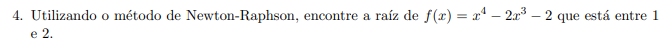

###Newtow - Raphson

Derivada: $f'(x) = 4x^3 - 6x^2 + 2 $

In [ ]:
def x_update(x):
    return (x**4 - 2*x**3 + 2*x - 2) / (4*x**3 - 6*x**2 + 2)

In [ ]:
x_ = 2
for i in range(10):
  x_ -= x_update(x_)
  print(x_)

1.8
1.7263586956521741
1.7168220336187894
1.716672785394999
1.7166727492822889
1.7166727492822869
1.7166727492822864
1.716672749282287
1.7166727492822866
1.7166727492822866


In [ ]:
x_

1.7166727492822866

## Questão 5
image.png

Derivada: $f'(x) = 1 / x^{2/3} $

$Xi = Xn - f(x)/ f'(x) $

$ Xi = Xn - 3x $

$Xi = -2x$

In [ ]:
def x_update(x):
 # return (3*x**(1/3) / (1/x**(2/3)))
 return -2*x

In [ ]:
x_ = 0.1
for i in range(10):
  x_ = x_update(x_)
  print(x_)

-0.2
0.4
-0.8
1.6
-3.2
6.4
-12.8
25.6
-51.2
102.4


## Questão 6
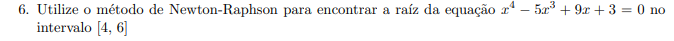

Derivada: $f(x) =  x^{4} - 5x^{3} + 9x + 3 =0$

In [ ]:
def x_update(x):
    return (x**4 - 5*x**3 + 9*x + 3) / (4*x**3 - 15*x**2 + 9)

In [ ]:
x_ = 7
for i in range(10):
  x_ -= x_update(x_)
  print(x_)

5.835913312693498
5.079797298585561
4.675183517834269
4.542968132828249
4.5290650977278615
4.528917973664248
4.528917957294362
4.528917957294362
4.528917957294362
4.528917957294362


In [ ]:
x_

4.528917957294362